
# Линейная регрессия. Практическая работа

## Цель практической работы

Научиться строить модель линейной регрессии на реальных данных.

## Что входит в практическую работу


1. Загрузить данные и ознакомиться с ними.
2. Изучить данные и провести анализ.
3. Разделить данные на обучающую и тестовую выборки.
4. Реализовать построение модели с помощью  библиотеки scikit-learn.
5. Получить качество модели с помощью MSE, MAE.


## Что оценивается 

* Выполнены все этапы работы.
* Сделан вывод по результатам.
* Модель не переобучена.
* Получена модель хорошего качества.

## Как отправить работу на проверку

Скачайте файл с заданиями в материалах, откройте его через Jupyter Notebook и выполните задачи. Сохраните изменения при помощи опции Save and Checkpoint из вкладки меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него.



## Что нужно сделать

Пусть у нас имеется некоторый набор данных `sales.csv` о продажах квартир:

- **SalePrice** (цена продажи, *зависимая переменная*).
- **GrLivArea** (наземная жилая зона).
- **OverallQuality** (общее качество).
- **GarageArea** (территория гаража).
- **SaleCondition** (условия сделки).

Реализуйте построение модели линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE. Определите, что вы не переобучились.

### 1. Импорт библиотек

In [1]:
# Ваш код здесь
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


### 2. Загрузка данных

In [2]:
# Ваш код здесь
df = pd.read_csv('sales.csv')

### 3. Первичный анализ

1. Проведите анализ данных, посмотрите на индивидуальные графики зависимости целевой функции и отдельной переменной. Нередко, если признаков в выборке не так много, удобно построить [sns.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html).
2. Закодируйте категориальные признаки (например, с помощью [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)).
3. Подумайте, можно ли здесь создать дополнительные переменные из имеющихся.
4. Сделайте предварительные выводы.

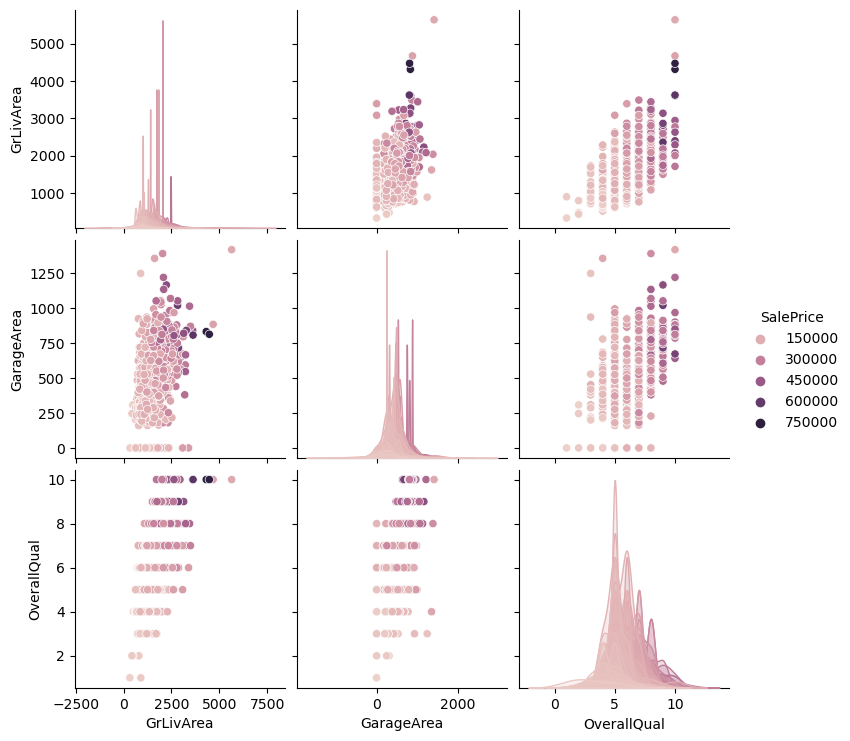

In [3]:
# Ваш код здесь
sb.pairplot(df, hue="SalePrice")

In [4]:
df_mid = pd.get_dummies(df['Street'], dtype=int)
df = pd.merge(df, df_mid, left_index=True, right_index=True)

In [5]:
df_mid = pd.get_dummies(df['SaleCondition'], dtype=int)
df = pd.merge(df, df_mid, left_index=True, right_index=True)

In [6]:
df = df.drop(['Street','SaleCondition'], axis=1)

In [7]:
cols = ['SalePrice',
        'GrLivArea', 
       'GarageArea', 
       'OverallQual', 
       ]

In [8]:
scaler2 = StandardScaler()
df_scaled = scaler2.fit_transform(df[cols])
df_scaled2 = df.copy()
#df_scaled[cols] = pd.DataFrame.from_records(df_scaled, columns=cols)
df_scaled2[cols] = pd.DataFrame.from_records(df_scaled, columns=cols)
df_scaled = df_scaled2.copy()

### 4. Разделение на обучающую и тестовую выборки

In [9]:
# Ваш код здесь
train, test = train_test_split(df_scaled, train_size=0.7, random_state=42)

### 5. Обучение модели линейной регрессии

Дополнительно можно взглянуть на коэффициенты и смещение обученной модели.

In [10]:
model = LinearRegression()
model.fit(train.drop('SalePrice', axis=1) , train['SalePrice'])


LinearRegression()

In [11]:
# Ваш код здесь
print('w_0:', model.intercept_)
print('w_1:', model.coef_)

w_0: 0.11926726441581167
w_1: [ 0.29729392  0.18347719  0.46746359  0.09525927 -0.09525927 -0.14817186
 -0.03674503  0.29575428 -0.304164   -0.05785467  0.25118128]


### 6. Получение предсказаний для обучающей и тестовой выборок

In [12]:
# Ваш код здесь
y_predict_train = model.predict(train.drop('SalePrice', axis=1)) #.predict(train.drop('SalePrice', axis=1))
y_predict_test = model.predict(test.drop('SalePrice', axis=1)) #.predict(test.drop('SalePrice', axis=1))

### 7. Проверка предсказаний

1. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE.
2. Постройте диаграмму рассеяния целевой и предсказанной переменных. 

In [13]:
scores = ['Salescond V',
 0.32848323387237943,
 0.33875285513554515,
 0.2419547388853109,
 0.2551190415041116,
 'Salescond V cut to norm and partial',
 0.32848323387237943,
 0.33875285513554515,
 0.2419547388853109,
 0.2551190415041116,
 'Salescond X',
 0.3382675195547552,
 0.33531847232742484,
 0.2642614933570056,
 0.25626934648055394,
 'Salescond X',
 0.32848323387237943,
 0.33875285513554515,
 0.2419547388853109,
 0.2551190415041116,
 'Salescond X',
 0.3880158346867137,
 0.3979164282917599,
 0.3493301942297998,
 0.37110455263146486,
 'Salescond X',
 0.3314607841554185,
 0.33631021353343243,
 0.2553557224770269,
 0.25040287240777875,
 'Salescond V full Steet V full',
 0.3314607841554185,
 0.33631021353343243,
 0.2553557224770269,
 0.25040287240777875]

In [14]:
train_mae = mean_absolute_error(train[['SalePrice']], y_predict_train)
test_mae = mean_absolute_error(test[['SalePrice']], y_predict_test)
train_score_mse = mean_squared_error(train['SalePrice'], y_predict_train)
test_score_mse = mean_squared_error(test['SalePrice'], y_predict_test)
scores.append('Salescond V full Steet V full')
scores.append(train_mae)
scores.append(test_mae)
scores.append(train_score_mse)
scores.append(test_score_mse)
print(train_mae)
print(test_mae)
print(train_score_mse)
print(test_score_mse)

0.3314607841554185
0.33631021353343243
0.2553557224770269
0.25040287240777875


In [15]:
scores

['Salescond V',
 0.32848323387237943,
 0.33875285513554515,
 0.2419547388853109,
 0.2551190415041116,
 'Salescond V cut to norm and partial',
 0.32848323387237943,
 0.33875285513554515,
 0.2419547388853109,
 0.2551190415041116,
 'Salescond X',
 0.3382675195547552,
 0.33531847232742484,
 0.2642614933570056,
 0.25626934648055394,
 'Salescond X',
 0.32848323387237943,
 0.33875285513554515,
 0.2419547388853109,
 0.2551190415041116,
 'Salescond X',
 0.3880158346867137,
 0.3979164282917599,
 0.3493301942297998,
 0.37110455263146486,
 'Salescond X',
 0.3314607841554185,
 0.33631021353343243,
 0.2553557224770269,
 0.25040287240777875,
 'Salescond V full Steet V full',
 0.3314607841554185,
 0.33631021353343243,
 0.2553557224770269,
 0.25040287240777875,
 'Salescond V full Steet V full',
 0.3314607841554185,
 0.33631021353343243,
 0.2553557224770269,
 0.25040287240777875]

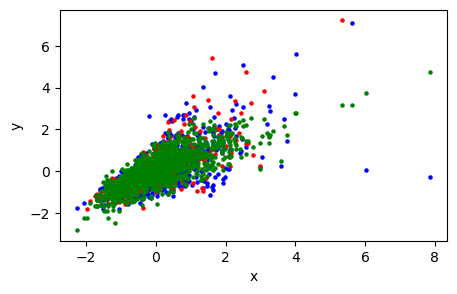

In [16]:
# Ваш код здесь
plt.figure(figsize=(5,3))
plt.scatter(train['GrLivArea'], train['SalePrice'], s=5, c='b')
plt.scatter(test['GrLivArea'], test['SalePrice'], s=5, c='r') 
plt.scatter(test['GrLivArea'], y_predict_test, s=5, c='g') 
plt.scatter(train['GrLivArea'], y_predict_train, s=5, c='g')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## вывод
результаты МАЕ и МСЕ без скалирования как то удручали, попробовал поиск по сетке параметров, не помогло. Сам поиск сохранен внизу "для порядку":)

Вы видите уже отскалированный вариант датасета и всего вытекающего, так цифры метрик хотя бы привычны человеческому глазу, на мой взгляд

итого имеется график, который примерно напоминает таргет. 
С такими показателями о переобучении говорить и не приходится. 

Как ни странно, за выбросы не отвечают строки SaleCondition == Abnormal, а какие то другие

Итого кроме очевидного вывода, что жил-площадь влияет на таргет и того, что даже кодирование самых малочисленных значений из object-колонок приводит к положительному влиянию на метрику я предложить не могу:( - достаточно ли этого, или я должен был "найти" что то еще?





## дальше смотреть в общем то не на что - там безрезультатный поиск по сетке и проверка гиппотезы о том, что какая то одна колонка могла бы дать более точную зависимость

In [16]:
X = train.drop(['SalePrice'], axis=1)
y = train['SalePrice']

X_test = test.drop(['SalePrice'], axis=1)
y_test = test['SalePrice']
for column in X.columns:
    X['col**2'] = X[column].apply(lambda x: x ** 2)
    X_test['col**2'] = X_test[column].apply(lambda x: x ** 2)
    model = LinearRegression()
    model.fit(X[[column, 'col**2']] , y)
    # Ваш код здесь
    y_predict_train = model.predict(X[[column, 'col**2']])
    y_predict_test = model.predict(X_test[[column, 'col**2']])
    train_score_mse = mean_squared_error(y, y_predict_train)
    train_score_mae = mean_absolute_error(y, y_predict_train)
    test_score_mse = mean_squared_error(y_test, y_predict_test)
    test_score_mse = mean_absolute_error(y_test, y_predict_test)
    print(column)
    print(train_score_mse)
    print(train_score_mae)
    print(test_score_mse)
    print(test_score_mse)
    print(' --- ')

GrLivArea
0.48488339993124074
0.4791456541266245
0.4848289075205331
0.4848289075205331
 --- 
GarageArea
0.5790548022754829
0.5238470313036422
0.5188577009862634
0.5188577009862634
 --- 
OverallQual
0.3195227284287566
0.3950117658516702
0.38462486752972397
0.38462486752972397
 --- 
Grvl
0.9549709419660476
0.714379751078927
0.7474553742719429
0.7474553742719429
 --- 
Pave
0.9549709419660477
0.7143797510789271
0.7474553742719429
0.7474553742719429
 --- 
Abnorml
0.9453445494803108
0.708097378864711
0.7406338821700277
0.7406338821700277
 --- 
AdjLand
0.9515112174465952
0.7123245307675117
0.7494003832830499
0.7494003832830499
 --- 
Alloca
0.9543424778970953
0.7140855909845999
0.7520071242048891
0.7520071242048891
 --- 
Family
0.9528165239292962
0.7133814684733718
0.7474853508121019
0.7474853508121019
 --- 
Normal
0.9301399931369035
0.7086708414266107
0.7430983300660273
0.7430983300660273
 --- 
Partial
0.8418368956052498
0.6741992126993789
0.7069665932506164
0.7069665932506164
 --- 


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [18]:
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

X_test = test.drop('SalePrice', axis=1)
y_test = test['SalePrice']


model = LinearRegression()
model.fit(X , y)

y_predict_train = model.predict(X)
y_predict_test = model.predict(X_test)
train_score_mse = mean_squared_error(y, y_predict_train)
test_score_mse = mean_squared_error(y_test, y_predict_test)


param_grid = {"fit_intercept": [True, False],
              "copy_X": [True, False],
              "positive": [True, False],
                          }


model = LinearRegression()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

best_model = grid_search.best_estimator_
print("Best Parameters: ", grid_search.best_params_)
print("Best Score (Negative Mean Squared Error): ", -grid_search.best_score_)


best_model.fit(X, y)
predictions_train = best_model.predict(train.drop('SalePrice', axis=1))
predictions_test = best_model.predict(test.drop('SalePrice', axis=1))

# Print the predictions
best_train_score_mse = mean_squared_error(train['SalePrice'], predictions_train)
best_test_score_mse = mean_squared_error(test['SalePrice'], predictions_test)
print(train_score_mse)
print(test_score_mse)
print('now the supposedly better ones')
print(best_train_score_mse)
print(best_test_score_mse)

Best Parameters:  {'copy_X': True, 'fit_intercept': False, 'positive': False}
Best Score (Negative Mean Squared Error):  0.27733657705414394
0.2553557224770269
0.25040287240777875
now the supposedly better ones
0.255355722477027
0.2504028724077787


In [19]:
test_score_mse - best_test_score_mse

5.551115123125783e-17